In [2]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import tree
import numpy

In [3]:
df = pd.read_csv("C:/Users/suhas/Downloads/archive (1)/play_tennis.csv",header=None)
df

,0,1,2,3,4,5
0,day,outlook,temp,humidity,wind,play
1,D1,Sunny,Hot,High,Weak,No
2,D2,Sunny,Hot,High,Strong,No
3,D3,Overcast,Hot,High,Weak,Yes
4,D4,Rain,Mild,High,Weak,Yes
5,D5,Rain,Cool,Normal,Weak,Yes
6,D6,Rain,Cool,Normal,Strong,No
7,D7,Overcast,Cool,Normal,Strong,Yes
8,D8,Sunny,Mild,High,Weak,No
9,D9,Sunny,Cool,Normal,Weak,Yes


In [5]:
encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)
df

,0,1,2,3,4,5
0,14,3,3,2,2,2
1,0,2,1,0,1,0
2,6,2,1,0,0,0
3,7,0,1,0,1,1
4,8,1,2,0,1,1
5,9,1,0,1,1,1
6,10,1,0,1,0,0
7,11,0,0,1,0,1
8,12,2,2,0,1,0
9,13,2,0,1,1,1


In [5]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()


In [6]:
model_cart = DecisionTreeClassifier(criterion = 'gini',max_depth =2)
model_id3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)

In [7]:
model_cart.fit(X,Y)
model_id3.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [8]:
pred_cart = model_cart.predict(X)
pred_id3 = model_id3.predict(X)

In [9]:
cm_cart = confusion_matrix(Y,pred_cart)
cm_id3 = confusion_matrix(Y,pred_id3)

In [10]:
print(cm_cart)
print(cm_id3)

[[4 1 0]
 [1 8 0]
 [0 1 0]]
[[5 0 0]
 [5 4 0]
 [0 0 1]]


[Text(0.4, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.524\nsamples = 15\nvalue = [5, 9, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.5\ngini = 0.579\nsamples = 11\nvalue = [5, 5, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.5\nsamples = 6\nvalue = [1, 4, 1]')]

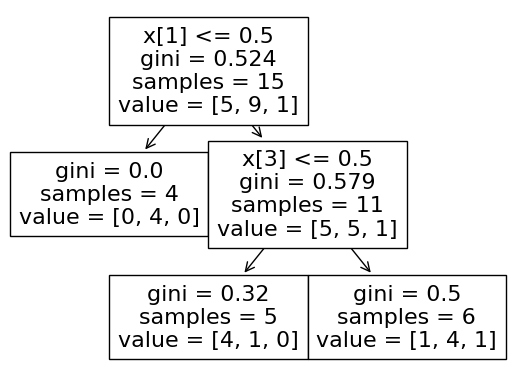

In [11]:
tree.plot_tree(model_cart)

[Text(0.6, 0.8333333333333334, 'x[4] <= 1.5\nentropy = 1.231\nsamples = 15\nvalue = [5, 9, 1]'),
 Text(0.4, 0.5, 'x[1] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9, 0]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 1.0\nsamples = 10\nvalue = [5, 5, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

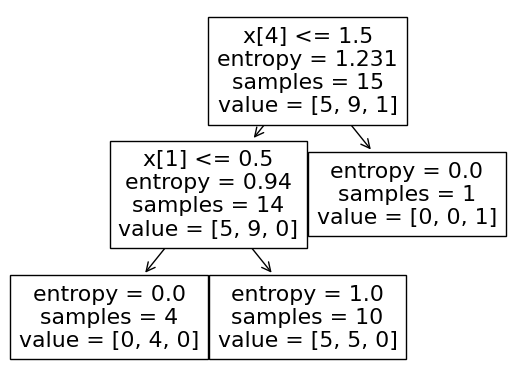

In [12]:
tree.plot_tree(model_id3)

In [13]:
from sklearn import metrics
y_test=Y
y_pred=pred_cart
print("cart")
print('Accuracy : ' , metrics.accuracy_score(y_test, y_pred))
print('Precison  : ' , metrics.precision_score(y_test, y_pred, average="weighted"))
print('Recall Score : ' , metrics.recall_score(y_test, y_pred, average="weighted"))
print('F1 Score : ' , metrics.f1_score(y_test, y_pred, average="weighted"))
print('MCC : ' , metrics.matthews_corrcoef(y_test, y_pred))
print("id3")
y_pred=pred_id3
print('Accuracy : ' , metrics.accuracy_score(y_test, y_pred))
print('Precison  : ' , metrics.precision_score(y_test, y_pred, average="weighted"))
print('Recall Score : ' , metrics.recall_score(y_test, y_pred, average="weighted"))
print('F1 Score : ' , metrics.f1_score(y_test, y_pred, average="weighted"))
print('MCC : ' , metrics.matthews_corrcoef(y_test, y_pred))


cart
Accuracy :  0.8
Precison  :  0.7466666666666666
Recall Score :  0.8
F1 Score :  0.7719298245614037
MCC :  0.5983735016339101
id3
Accuracy :  0.6666666666666666
Precison  :  0.8333333333333334
Recall Score :  0.6666666666666666
F1 Score :  0.658119658119658
MCC :  0.5580687036253706


c:\Users\suhas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
